# Which movie does reddit think will win best picture?

This project leverages sentiment analysis of Reddit comments to predict potential Best Picture nominees. By collecting user comments from official discussion threads of various movies on the /r/movies subreddit, the program categorizes the sentiments expressed in the comments as positive, negative, or neutral. Sentiment scores are calculated for each movie based on the comments’ emotional tone, providing insights into how well-received the film is by the Reddit community.

The sentiment analysis is performed using TextBlob, and the results are visualized through bar charts and minimalist donut charts to showcase the distribution of sentiments and the overall sentiment score. The project’s goal is to analyze the public’s reaction to movies and hypothesize which films may have the most favorable reception, possibly correlating with future award nominations, such as the Academy Award for Best Picture.

The analysis can be extended to include additional movies and threads, providing a dynamic and data-driven approach to movie discussions online.

Positive Comments for Anora: 1128
Negative Comments for Anora: 339
Neutral Comments for Anora: 309


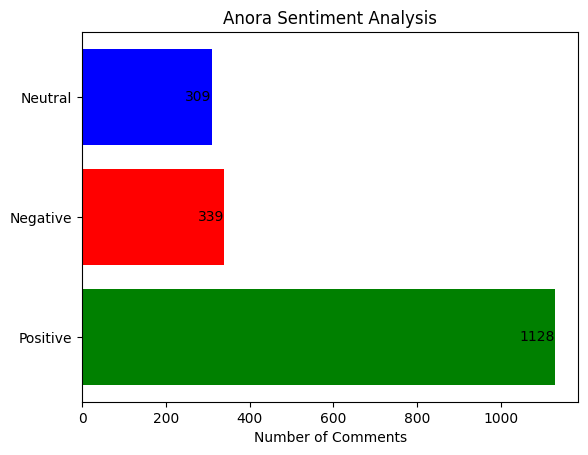

Anora Sentiment Score: 44.43


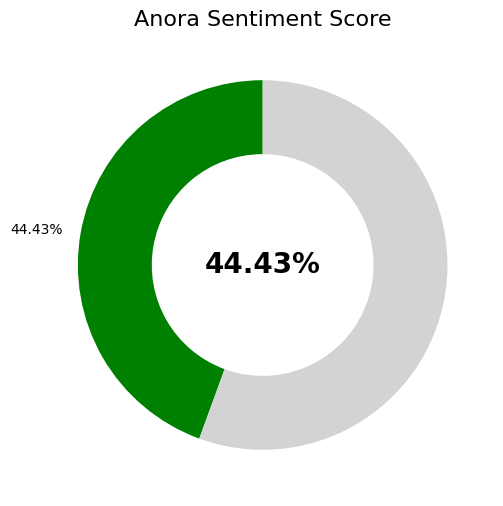

Positive Comments for The Brutalist: 655
Negative Comments for The Brutalist: 184
Neutral Comments for The Brutalist: 205


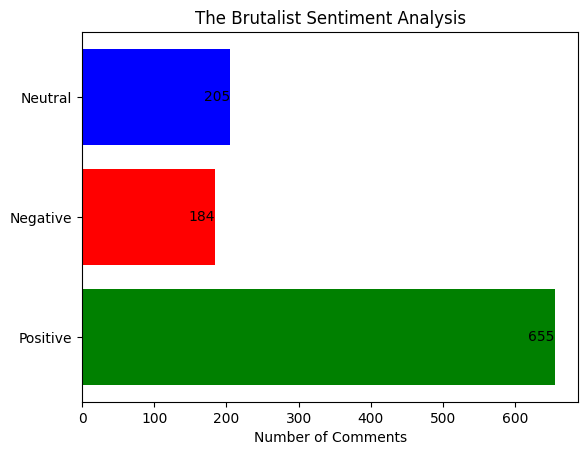

The Brutalist Sentiment Score: 45.11


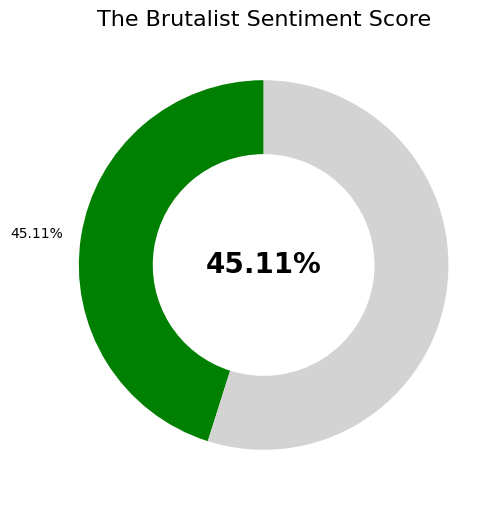

Positive Comments for A Complete Unknown: 557
Negative Comments for A Complete Unknown: 130
Neutral Comments for A Complete Unknown: 176


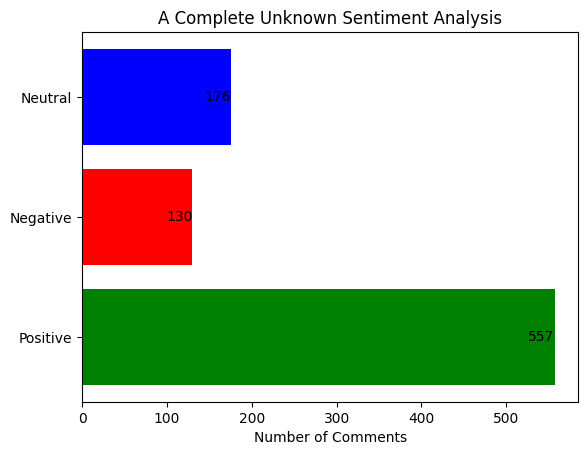

A Complete Unknown Sentiment Score: 49.48


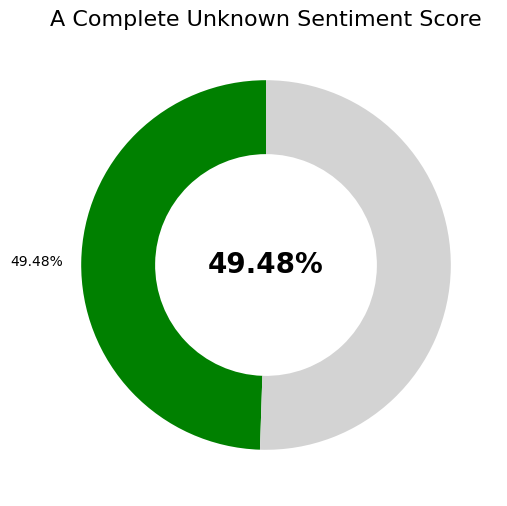

Positive Comments for Conclave: 756
Negative Comments for Conclave: 241
Neutral Comments for Conclave: 322


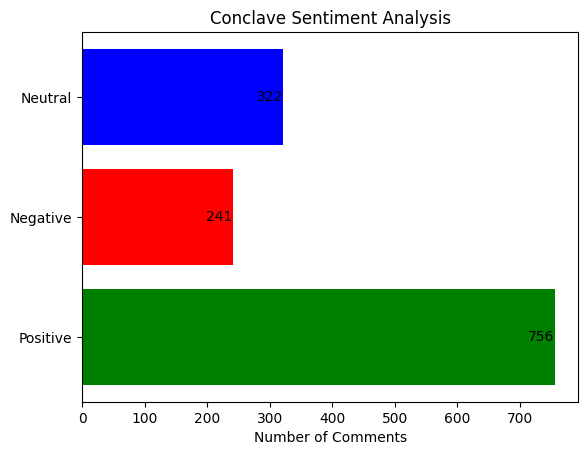

Conclave Sentiment Score: 39.04


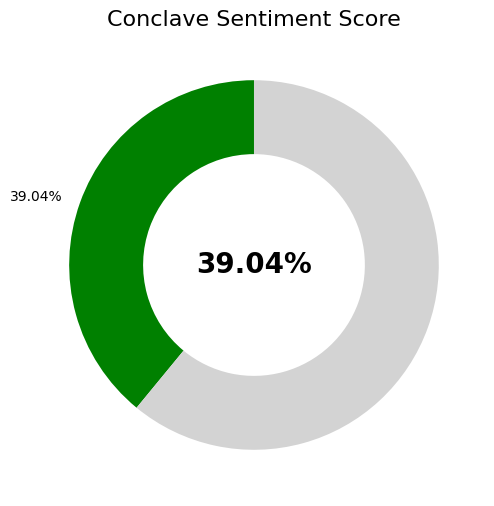

An error occurred: received 429 HTTP response
Positive Comments for Emilia Perez: 264
Negative Comments for Emilia Perez: 128
Neutral Comments for Emilia Perez: 76


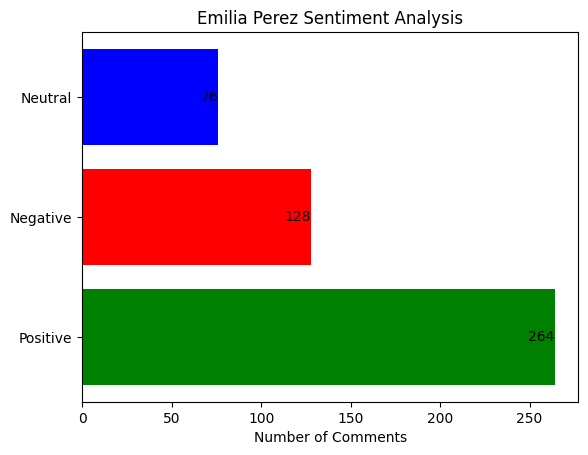

Emilia Perez Sentiment Score: 29.06


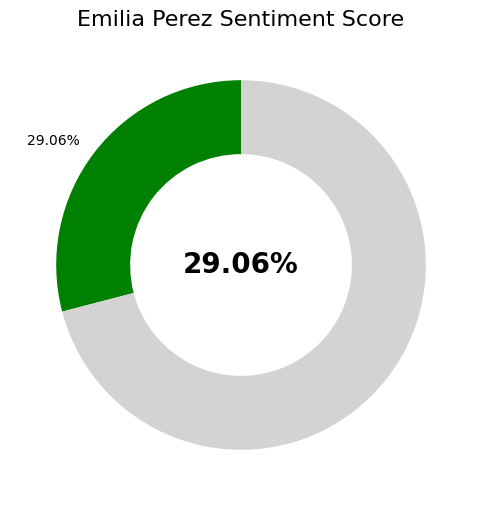

Positive Comments for I'm Still Here: 40
Negative Comments for I'm Still Here: 11
Neutral Comments for I'm Still Here: 28


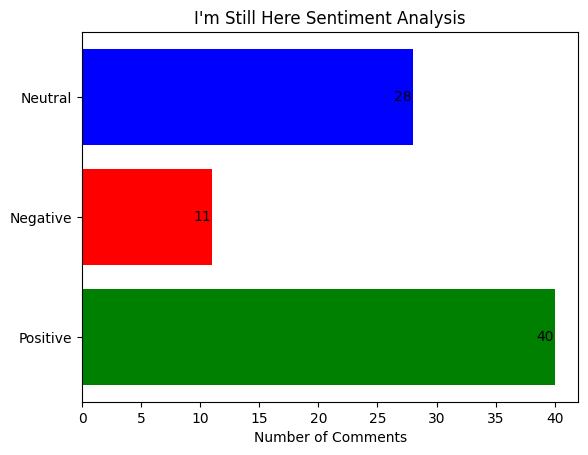

I'm Still Here Sentiment Score: 36.71


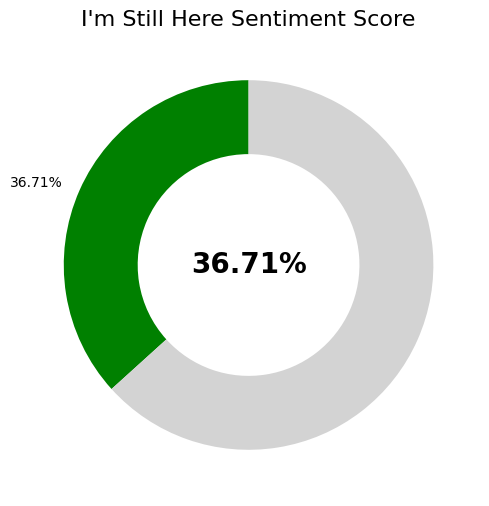

Positive Comments for Nickel Boys: 111
Negative Comments for Nickel Boys: 31
Neutral Comments for Nickel Boys: 7


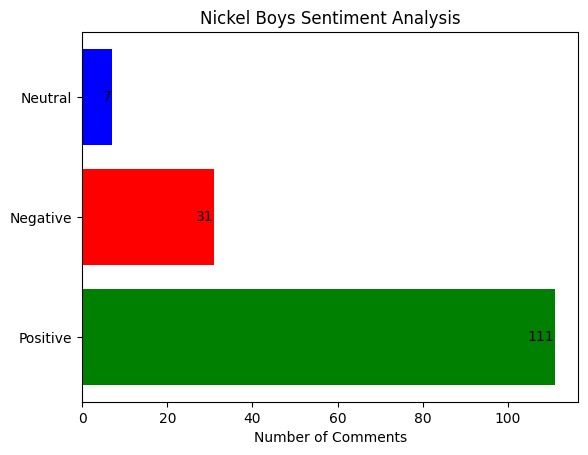

Nickel Boys Sentiment Score: 53.69


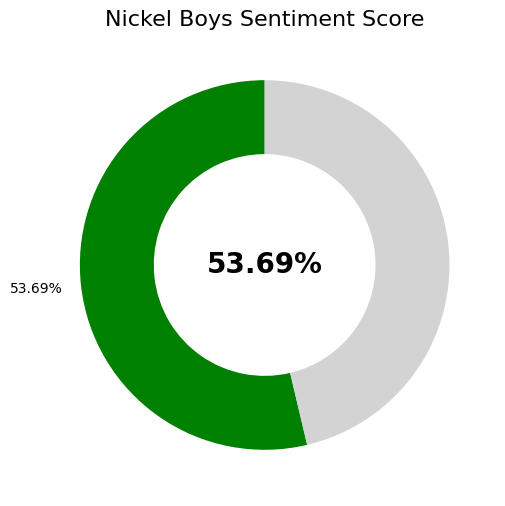

Positive Comments for The Substance: 3393
Negative Comments for The Substance: 1310
Neutral Comments for The Substance: 1366


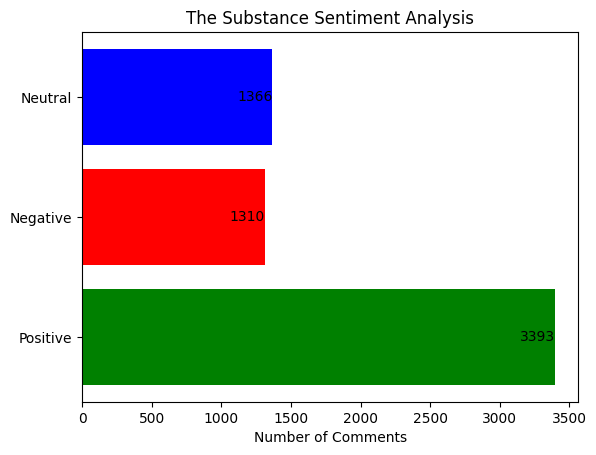

The Substance Sentiment Score: 34.32


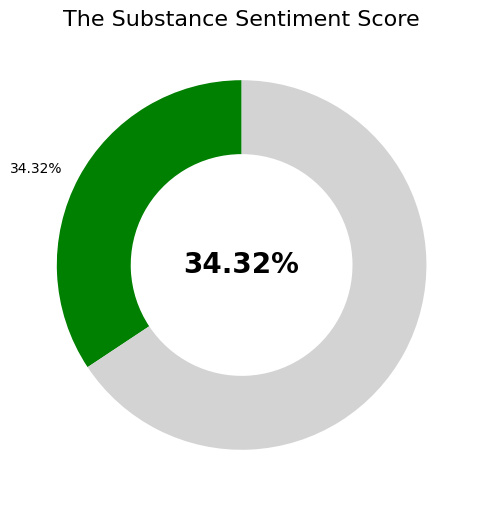

An error occurred: received 429 HTTP response
[('Anora', 44.42567567567568), ('The Brutalist', 45.11494252873563), ('A Complete Unknown', 49.47856315179606), ('Conclave', 39.044730856709634), ('Emilia Perez', 29.059829059829063), ("I'm Still Here", 36.708860759493675), ('Nickel Boys', 53.691275167785236), ('The Substance', 34.32196407974955)]


In [ ]:
import praw
import matplotlib.pyplot as plt
from textblob import TextBlob
from matplotlib.patches import Wedge
import os
import numpy as np
import time


# Assuming you're using PRAW for Reddit API access
reddit = praw.Reddit(client_id=client_id,
                     client_secret=api_key,
                     user_agent='my_reddit_script_jpherson')

# Define the analyze_sentiment function
def analyze_sentiment(text):
    # Simple sentiment analysis using TextBlob
    blob = TextBlob(text)
    sentiment = blob.sentiment.polarity  # Returns a value between -1 and 1
    return sentiment

# The list of movie names and URLs
urls_and_movies = [
    ("Anora", "https://www.reddit.com/r/movies/comments/1ggv4yg/official_discussion_anora_spoilers/"),
    ("The Brutalist", "https://www.reddit.com/r/movies/comments/1i37yra/official_discussion_the_brutalist_spoilers/"),
    ("A Complete Unknown", "https://www.reddit.com/r/movies/comments/1hlsi27/official_discussion_a_complete_unknown_spoilers/"),
    ("Conclave", "https://www.reddit.com/r/movies/comments/1gbjlm7/official_discussion_conclave_spoilers/"),
    ("Dune: Part Two", "https://www.reddit.com/r/movies/comments/1b3jo9s/official_discussion_dune_part_two_spoilers/"),
    ("Emilia Perez", "https://www.reddit.com/r/movies/comments/1grn0lz/official_discussion_emilia_p%C3%A9rez_spoilers/"),
    ("I'm Still Here", "https://www.reddit.com/r/movies/comments/1gpzxb2/im_still_here_official_trailer_2025/"),
    ("Nickel Boys", "https://www.reddit.com/r/movies/comments/1i8m8iz/official_discussion_nickel_boys_spoilers/"),
    ("The Substance", "https://www.reddit.com/r/movies/comments/1fl1bpl/official_discussion_the_substance_spoilers/"),
    ("Wicked: Part I", "https://www.reddit.com/r/movies/comments/1gwxxy1/official_discussion_wicked_part_i_spoilers/")
]

movie_scores =[]

# Loop through all of the comments and assign each a score
for movie, url in urls_and_movies:
    try:
        # Fetch the Reddit post
        submission = reddit.submission(url=url)
        submission.comments.replace_more(limit=None)
        comments = submission.comments.list()

        # Initialize the lists to store comments
        positive_comments = []
        negative_comments = []
        neutral_comments = []

        # Loop through the comments to analyze sentiment
        for comment in comments:
            comment_body = comment.body
            sentiment_score = analyze_sentiment(comment_body)

            # Categorize the sentiment score
            if sentiment_score > 0:
                positive_comments.append(comment_body)
            elif sentiment_score < 0:
                negative_comments.append(comment_body)
            else:
                neutral_comments.append(comment_body)

        # Print the sentiment counts
        print(f"Positive Comments for {movie}: {len(positive_comments)}")
        print(f"Negative Comments for {movie}: {len(negative_comments)}")
        print(f"Neutral Comments for {movie}: {len(neutral_comments)}")

        # Set the categories and counts for the plot
        categories = ['Positive', 'Negative', 'Neutral']
        counts = [len(positive_comments), len(negative_comments), len(neutral_comments)]

        # Create the bar chart
        fig, ax = plt.subplots()

        bars = ax.barh(categories, counts, color=['green', 'red', 'blue'])

        # Add data labels on the bars
        for bar in bars:
            width = bar.get_width()
            label_x_pos = width - 0.1 if width > 0 else width + 0.1
            ax.text(label_x_pos, bar.get_y() + bar.get_height()/2, f'{width}', va='center', ha='right' if width > 0 else 'left')

        # Set the labels and title for the plot
        ax.set_xlabel('Number of Comments')
        ax.set_title(f'{movie} Sentiment Analysis')

        # Show the plot
        plt.show()

        ################################# Table with all scores #################################
        # After collecting sentiment scores in the movie_scores list

        import matplotlib.pyplot as plt
        import numpy as np

        # Extract the movie names and sentiment scores
        movies = [movie for movie, score in movie_scores]
        scores = [score for movie, score in movie_scores]

        # Create a bar chart to visualize sentiment scores
        plt.figure(figsize=(10, 6))
        plt.barh(movies, scores, color=['green' if score >= 0 else 'red' for score in scores])

        # Add labels and title
        plt.xlabel('Sentiment Score')
        plt.title('Sentiment Analysis for Movies Based on Reddit Comments')
        plt.xlim(-100, 100)

        # Add data labels on each bar
        for index, score in enumerate(scores):
            plt.text(score + (5 if score > 0 else -5), index, f'{score:.2f}', va='center', ha='left' if score > 0 else 'right', fontweight='bold')

        # Show the plot
        plt.tight_layout()
        plt.show()

        ################################# Minimalist Donut Chart #################################

        positive_count = len(positive_comments)
        negative_count = len(negative_comments)
        neutral_count = len(neutral_comments)

        # Calculate the score
        total_comments = positive_count + negative_count + neutral_count
        if total_comments > 0:
            score = (positive_count - negative_count) / total_comments * 100
        else:
            score = 0

        print(f"{movie} Sentiment Score: {score:.2f}")

        movie_scores.append((movie, score))

        # Create a minimalist donut chart to represent the score
        fig, ax = plt.subplots(figsize=(6, 6))
        wedges, texts = ax.pie([score, 100 - score], labels=[f'{score:.2f}%', ''], startangle=90, colors=['green', 'lightgray'], wedgeprops=dict(width=0.4))

        # Add the score in the center of the donut
        ax.text(0, 0, f'{score:.2f}%', horizontalalignment='center', verticalalignment='center', fontsize=20, fontweight='bold')

        # Set title
        ax.set_title(f'{movie} Sentiment Score', fontsize=16)

        plt.show()

        


# Exception handling
    except praw.exceptions.APIException as e:
            if e.error_type == 'RATELIMIT':
                print(f'Rate limit exceeded. Sleeping for {e.sleep_time} seconds.')
                time.sleep(e.sleep_time)
            else:
                raise
    except Exception as e:
            print(f'An error occurred: {e}')
            time.sleep(60)  # Sleep for 60 seconds before retrying

print(movie_scores)